In [1]:
import xarray as xr
import numpy as np
import logging

# Create some helper functions for later
def reset_chunk_encoding(da: xr.Dataset) -> xr.Dataset:
    """resets previous chunk encoding on concatenated zarr stores

    :param da: Dataset
    :return: Dataset with reset chunk encoding
    """
    for x in da.coords:
        if "chunks" in da[x].encoding.keys():
            logging.info(f"deleting chunk encoding for {x}...")
            del da[x].encoding["chunks"]
        if da.coords[x].dtype == object:
            da[x].encoding.clear()

    for var in da:
        if "chunks" in da[var].encoding.keys():
            logging.info(f"deleting chunk encoding for {var}...")
            del da[var].encoding["chunks"]
        if da[x].dtype == object:
            da[x].encoding.clear()
    return da

targ_lst = ['swvl1',
            'swvl2',
            'swvl3',
            'stl1',
            'stl2',
            'stl3',
            'snowc'
            ]

In [3]:
ds = xr.open_zarr("/ec/res4/hpcperm/daep/ec_land_training_db/ecland_i8ki_o200_2010_2022_6h.zarr").sel(time=slice("2010", "2020"))
ds
#ds = xr.open_zarr("/ec/res4/hpcperm/daep/ec_land_training_db/ecland_i6aj_o400_2010_2022_6h_euro.zarr").data.sel(time=slice("2021", "2022")).to_dataset()
#ds

<xarray.Dataset> Size: 102GB
Dimensions:                     (x: 47892, clim_variable: 23, time: 16072,
                                 variable: 33)
Coordinates:
  * clim_variable               (clim_variable) object 184B 'clim_cell_area' ...
    lat                         (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon                         (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 129kB 2010-01-01 ... 20...
  * variable                    (variable) object 264B 'met_ctpf' ... 'es'
  * x                           (x) int32 192kB 713 714 715 ... 167199 167200
Data variables: (12/18)
    clim_data                   (x, clim_variable) float32 4MB dask.array<chunksize=(47892, 23), meta=np.ndarray>
    clim_maxs                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_means                  (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_mins                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_stdevs                 (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    data                        (time, x, variable) float32 102GB dask.array<chunksize=(4, 47892, 33), meta=np.ndarray>
    ...                          ...
    global_data_1stdiff_means   (x, variable) float32 6MB dask.array<chunksize=(47892, 33), meta=np.ndarray>
    global_data_1stdiff_stdevs  (x, variable) float32 6MB dask.array<chunksize=(47892, 33), meta=np.ndarray>
    global_data_maxs            (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_means           (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_mins            (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>
    global_data_stdevs          (x, variable) float32 6MB dask.array<chunksize=(11973, 9), meta=np.ndarray>

In [23]:
# Create the x-index and plot to check the data looks correct
# [lon_min -12, lon_max 43, lat_min 34, lat_max 72]
# x_idx = ds_399.x.where((ds.lat > 34) & (ds.lat < 72) & (ds.lon > -12) & (ds.lon < 43)).dropna(dim='x').values
northern_europe_x_idx = ds.x.where((ds.lat > 55) & (ds.lat < 71) & (ds.lon > 5) & (ds.lon < 20)).dropna(dim='x').values
print(len(northern_europe_x_idx))
ds.sel(x=northern_europe_x_idx, variable="met_tair").isel(time=0).plot.scatter(x="lon", y="lat", hue="data", edgecolor='none', s=5)

755


In [24]:
southern_europe_x_idx = ds.x.where((ds.lat > 41.5) & (ds.lat < 51.1) & (ds.lon > -5.1) & (ds.lon < 6.0)).dropna(dim='x').values
print(len(southern_europe_x_idx))
ds.sel(x=southern_europe_x_idx, variable="met_tair").isel(time=0).plot.scatter(x="lon", y="lat", hue="data", edgecolor='none', s=5)

721


In [25]:
ds_northern_euro = ds.sel(x=northern_europe_x_idx)
ds_southern_euro = ds.sel(x=southern_europe_x_idx)
ds_southern_euro

<xarray.Dataset> Size: 2GB
Dimensions:                     (x: 721, clim_variable: 23, time: 18744,
                                 variable: 33)
Coordinates:
  * clim_variable               (clim_variable) object 184B 'clim_cell_area' ...
    lat                         (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
    lon                         (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 150kB 2010-02-01 ... 20...
  * variable                    (variable) object 264B 'met_ctpf' ... 'es'
  * x                           (x) int32 3kB 62973 62974 62977 ... 96319 96320
Data variables: (12/18)
    clim_data                   (x, clim_variable) float32 66kB dask.array<chunksize=(721, 23), meta=np.ndarray>
    clim_maxs                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_means                  (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_mins                   (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    clim_stdevs                 (clim_variable) float32 92B dask.array<chunksize=(23,), meta=np.ndarray>
    data                        (time, x, variable) float32 2GB dask.array<chunksize=(4, 721, 33), meta=np.ndarray>
    ...                          ...
    global_data_1stdiff_means   (x, variable) float32 95kB dask.array<chunksize=(721, 33), meta=np.ndarray>
    global_data_1stdiff_stdevs  (x, variable) float32 95kB dask.array<chunksize=(721, 33), meta=np.ndarray>
    global_data_maxs            (x, variable) float32 95kB dask.array<chunksize=(520, 9), meta=np.ndarray>
    global_data_means           (x, variable) float32 95kB dask.array<chunksize=(520, 9), meta=np.ndarray>
    global_data_mins            (x, variable) float32 95kB dask.array<chunksize=(520, 9), meta=np.ndarray>
    global_data_stdevs          (x, variable) float32 95kB dask.array<chunksize=(520, 9), meta=np.ndarray>

In [28]:
# Save europe subset to new zarr-store
reset_chunk_encoding(ds_southern_euro.chunk({"x": -1, "time": 4, "variable": -1, "clim_variable": -1})).to_zarr("/ec/res4/hpcperm/pamw/ecland_i6aj_o400_2010_2022_6h_euro_southern.zarr")
reset_chunk_encoding(ds_northern_euro.chunk({"x": -1, "time": 4, "variable": -1, "clim_variable": -1})).to_zarr("/ec/res4/hpcperm/pamw/ecland_i6aj_o400_2010_2022_6h_euro_northern.zarr")

In [29]:
# ds = xr.open_zarr("/ec/res4/hpcperm/daep/ec_land_training_db/ecland_i8ki_2010_2022_6h.zarr").data.sel(time=slice("2010", "2020")).to_dataset()
#ds = xr.open_zarr("/ec/res4/hpcperm/pamw/ecland_i6aj_o400_2010_2022_6h_euro_northern.zarr").data.sel(time=slice("2021", "2021")).to_dataset()
ds = xr.open_zarr("/ec/res4/hpcperm/pamw/ecland_i6aj_o400_2010_2022_6h_euro_southern.zarr").data.sel(time=slice("2010", "2020"))
ds = ds.sel(time=~((ds.time.dt.month == 2) & (ds.time.dt.day == 29))).to_dataset() # filter out leap day.
ds

<xarray.Dataset> Size: 2GB
Dimensions:   (x: 721, time: 15936, variable: 33)
Coordinates:
    lat       (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
    lon       (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
  * time      (time) datetime64[ns] 127kB 2010-02-01 ... 2020-12-31T18:00:00
  * variable  (variable) object 264B 'met_ctpf' 'met_lwdown' ... 'slhf' 'es'
  * x         (x) int32 3kB 62973 62974 62977 62978 ... 96317 96318 96319 96320
Data variables:
    data      (time, x, variable) float32 2GB dask.array<chunksize=(4, 721, 33), meta=np.ndarray>

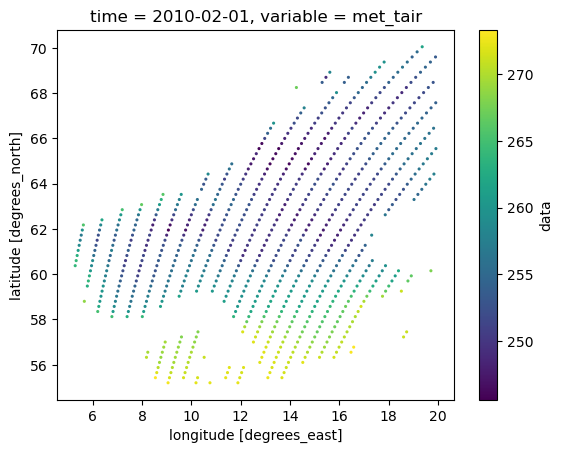

In [4]:
ds.sel(variable="met_tair").isel(time=0).plot.scatter(x="lon", y="lat", hue="data", edgecolor='none', s=5)

In [39]:
# Create a fractional DOY index on dataset so we can select any 6-hr time for all years
hourly_doy_idx = (ds['time.hour']/24 + ds['time.dayofyear'])
hourly_doy_idx.name = "doy"
# Groupby fractional DOY and compute mean and std for climatology
climatology_6hrly = ds.data.groupby(hourly_doy_idx).mean(dim='time').to_dataset(name="clim_6hr_mu")
climatology_6hrly["clim_6hr_std"] = ds.groupby(hourly_doy_idx).std(dim='time').data
climatology_6hrly

<xarray.Dataset> Size: 279MB
Dimensions:       (x: 721, variable: 33, doy: 1464)
Coordinates:
    lat           (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
    lon           (x) float32 3kB dask.array<chunksize=(721,), meta=np.ndarray>
  * variable      (variable) object 264B 'met_ctpf' 'met_lwdown' ... 'slhf' 'es'
  * x             (x) int32 3kB 62973 62974 62977 62978 ... 96318 96319 96320
  * doy           (doy) float64 12kB 1.0 1.25 1.5 1.75 ... 366.2 366.5 366.8
Data variables:
    clim_6hr_mu   (doy, x, variable) float32 139MB dask.array<chunksize=(1, 721, 33), meta=np.ndarray>
    clim_6hr_std  (doy, x, variable) float32 139MB dask.array<chunksize=(1, 721, 33), meta=np.ndarray>

In [7]:
#climatology_6hrly.to_netcdf("../evaluation/analyses/climatology/climatology_6hrly_southern_europe.nc")
climatology_6hrly.to_netcdf("../evaluation/analyses/climatology/climatology_6hrly_global.nc")

In [6]:
climatology_6hrly['clim_6hr_mu'].sel(variable=targ_lst).values
#climatology_6hrly['variable'].sel(variable=targ_lst)

array([[[3.85296643e-01, 3.67381275e-01, 3.64553839e-01, ...,
         2.71739197e+02, 2.72370850e+02, 9.76035156e+01],
        [3.88676465e-01, 3.80972296e-01, 3.77929688e-01, ...,
         2.72982544e+02, 2.73912842e+02, 9.61185532e+01],
        [2.71997064e-01, 2.46253967e-01, 2.26843268e-01, ...,
         2.70698547e+02, 2.71318298e+02, 9.45332031e+01],
        ...,
        [1.08551025e-01, 1.81306452e-01, 1.83605954e-01, ...,
         2.79038391e+02, 2.82652893e+02, 1.02343753e-01],
        [1.01174928e-01, 1.74598694e-01, 1.77539065e-01, ...,
         2.79145447e+02, 2.82878662e+02, 6.11328110e-02],
        [1.02459714e-01, 1.65333554e-01, 1.69395447e-01, ...,
         2.79446594e+02, 2.83197998e+02, 4.39453125e-02]],

       [[3.85124207e-01, 3.67321789e-01, 3.64334106e-01, ...,
         2.71778046e+02, 2.72367218e+02, 9.76035156e+01],
        [3.87300104e-01, 3.80030811e-01, 3.77665699e-01, ...,
         2.72980194e+02, 2.73909973e+02, 9.63910141e+01],
        [2.71981806e-01, 

In [10]:
ds = ds.rename({'time': 'doy'})
ds.sel(variable=targ_lst, doy='2020')

<xarray.Dataset> Size: 2GB
Dimensions:   (x: 47892, doy: 1464, variable: 7)
Coordinates:
    lat       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
  * doy       (doy) datetime64[ns] 12kB 2020-01-01 ... 2020-12-31T18:00:00
  * variable  (variable) object 56B 'swvl1' 'swvl2' 'swvl3' ... 'stl3' 'snowc'
  * x         (x) int32 192kB 713 714 715 784 ... 167197 167198 167199 167200
Data variables:
    data      (doy, x, variable) float32 2GB dask.array<chunksize=(4, 47892, 7), meta=np.ndarray>

In [15]:
anomaly = ds.sel(variable=targ_lst, doy='2020') - climatology_6hrly['clim_6hr_mu'].sel(variable=targ_lst)
anomaly

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [14]:
# If we want to just access all of the same 6hr index for all years we can do the following
ds_doy = ds.reindex({"doy": hourly_doy_idx.values})
ds_doy

/perm/pamw/venvs/mytorchcuda/lib/python3.9/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset> Size: 102GB
Dimensions:   (doy: 16072, variable: 33, x: 47892)
Coordinates:
  * doy       (doy) float64 129kB 1.0 1.25 1.5 1.75 ... 366.0 366.2 366.5 366.8
  * variable  (variable) object 264B 'met_ctpf' 'met_lwdown' ... 'slhf' 'es'
  * x         (x) int32 192kB 713 714 715 784 ... 167197 167198 167199 167200
    lat       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
Data variables:
    data      (doy, x, variable) float32 102GB dask.array<chunksize=(16072, 47892, 33), meta=np.ndarray>

In [8]:
# Select all 1st Jan 12:00 values across all years
ds_doy.sel(doy = 1.5)

<xarray.Dataset> Size: 70MB
Dimensions:   (doy: 11, variable: 33, x: 47892)
Coordinates:
  * doy       (doy) float64 88B 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
  * variable  (variable) object 264B 'met_ctpf' 'met_lwdown' ... 'slhf' 'es'
  * x         (x) int32 192kB 713 714 715 784 ... 167197 167198 167199 167200
    lat       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
    lon       (x) float32 192kB dask.array<chunksize=(47892,), meta=np.ndarray>
Data variables:
    data      (doy, x, variable) float32 70MB dask.array<chunksize=(11, 47892, 33), meta=np.ndarray>